In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
df=pd.read_csv('Real_Estate.csv')

In [3]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [12]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [5]:
import datetime

In [6]:
df['Transaction date'] = pd.to_datetime(df['Transaction date'])

In [7]:
df['Transaction year'] = df['Transaction date'].dt.year
df['Transaction month'] = df['Transaction date'].dt.month

In [8]:
df = df.drop(columns=['Transaction date'])

In [9]:
df.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Transaction year,Transaction month
0,13.3,4082.0150,8,25.007059,121.561694,6.488673,2012,9
1,35.5,274.0144,2,25.012148,121.546990,24.970725,2012,9
2,1.1,1978.6710,10,25.003850,121.528336,26.694267,2012,9
3,22.2,1055.0670,5,24.962887,121.482178,38.091638,2012,9
4,8.5,967.4000,6,25.011037,121.479946,21.654710,2012,9


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X = df.drop('House price of unit area', axis=1)
Y = df['House price of unit area']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled.shape

(331, 7)

In [15]:
X_test_scaled.shape

(83, 7)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [18]:
results = {}
for name,model in models.items():
    #creating the model
    model.fit(X_train_scaled, Y_train)
    #making predictions on the test set
    predictions = model.predict(X_test_scaled)
    #calculating evaluation metrics
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    #storing the metrics
    results[name] = {"MAE": mae, "R2": r2}

In [19]:
results_df = pd.DataFrame(results).T  #convert the results to a DataFrame for better readability
print(results_df)

                         MAE        R2
Linear Regression   9.748246  0.529615
Decision Tree      11.760342  0.204962
Random Forest       9.887601  0.509547
Gradient Boosting  10.000117  0.476071


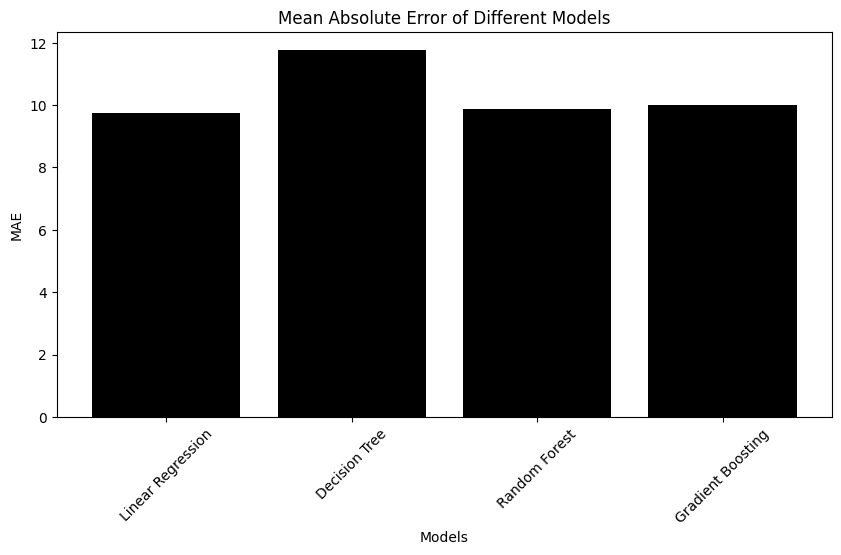

In [20]:
#Plotting MAE
plt.figure(figsize=(10, 5))
plt.bar(results_df.index, results_df['MAE'], color='black')
plt.title('Mean Absolute Error of Different Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

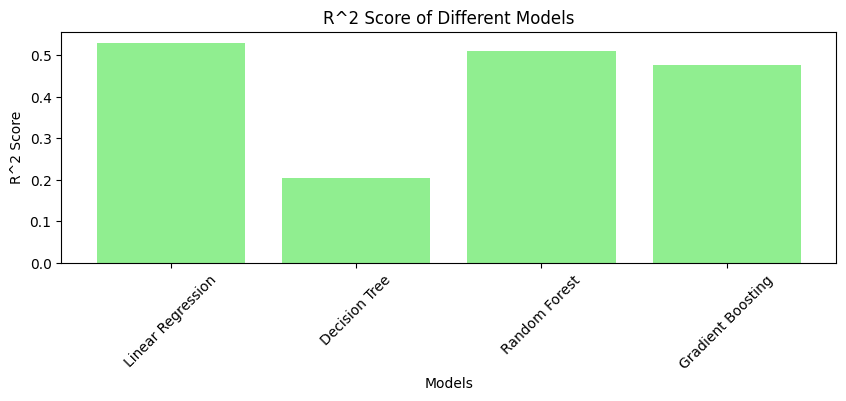

In [21]:
plt.figure(figsize=(10, 3))
plt.bar(results_df.index, results_df['R2'],color='lightgreen')
plt.title('R^2 Score of Different Models')
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)
plt.show()

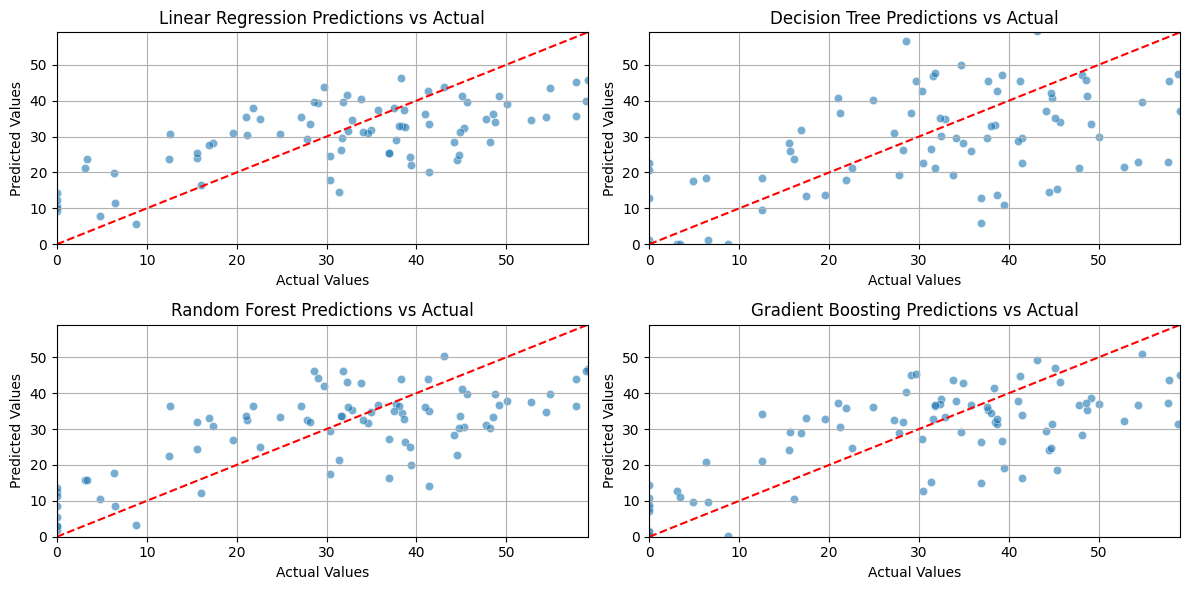

In [22]:
#create a figure
plt.figure(figsize=(12,6))
#Iterate through each model and plot
for i, (name, model) in enumerate(models.items()):
    #make predictions
    predictions = model.predict(X_test_scaled)
   
    #create a subplot for each model
    plt.subplot(2,2,i+1) #adjust grid size as needed
    sns.scatterplot(x=Y_test, y=predictions, alpha=0.6)
    sns.lineplot(x=Y_test, y=Y_test, color='red', linestyle='--')  #line for perfect predictions
    plt.title(f'{name} Predictions vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.xlim(min(Y_test),max(Y_test))
    plt.ylim(min(Y_test),max(Y_test))
    plt.grid()
plt.tight_layout()
plt.show()
